In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn import svm
import numpy as np

In [2]:
from helper.functions import get_dataset_from_json

In [30]:
X_dict, y_str = get_dataset_from_json("featuresQuixote_cohesive_punctuation.json")

In [31]:
# Converts from list of dictionaries featurename -> value to array of numbers
v = DictVectorizer(sparse=False)

X = v.fit_transform(X_dict)

In [32]:
X.shape

(378, 1210)

In [33]:
encoder = LabelEncoder()

y = encoder.fit_transform(y_str)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [35]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
num_folds = kf.get_n_splits()

NB_acc_in = np.zeros(num_folds)
NB_acc_out = np.zeros(num_folds)

SVM_acc_in = np.zeros(num_folds)
SVM_acc_out = np.zeros(num_folds)

In [38]:
iteration = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(X_train.shape, y_train.shape)
    
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    NB_acc_in[iteration]  = nb_model.score(X_train, y_train)
    
    y_pred_nb             = nb_model.predict(X_test)
    NB_acc_out[iteration] = nb_model.score(X_test, y_test)
    
    svm_model = svm.SVC(kernel="linear")
    svm_model.fit(X_train, y_train)
    
    SVM_acc_in[iteration] = svm_model.score(X_train, y_train)
    
    y_pred_svm = svm_model.predict(X_test)
    SVM_acc_out[iteration] = svm_model.score(X_test, y_test)
    
    
    iteration += 1

(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(340, 1210) (340,)
(341, 1210) (341,)
(341, 1210) (341,)


In [39]:
NB_acc_in.mean()

0.990003450060376

In [40]:
NB_acc_out.mean()

0.8679231863442389

In [41]:
SVM_acc_in.mean()

1.0

In [42]:
SVM_acc_out.mean()

0.957610241820768

# Another experiment

In [16]:
X_dict, y_str = get_dataset_from_json("featuresIbsen_bigrams_pos_punct.json")

In [17]:
# Converts from list of dictionaries featurename -> value to array of numbers
v = DictVectorizer(sparse=False)

X = v.fit_transform(X_dict)

In [18]:
X.shape

(235, 730)

In [19]:
encoder = LabelEncoder()

y = encoder.fit_transform(y_str)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.]])

In [22]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [23]:
num_folds = kf.get_n_splits()

NB_acc_in = np.zeros(num_folds)
NB_acc_out = np.zeros(num_folds)

SVM_acc_in = np.zeros(num_folds)
SVM_acc_out = np.zeros(num_folds)

In [30]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix

In [34]:
import scikitplot as skplot

[[10  0]
 [ 1 13]]
[[ 9  0]
 [ 0 15]]
[[ 8  0]
 [ 0 16]]
[[14  0]
 [ 0 10]]
[[12  1]
 [ 0 11]]
[[10  0]
 [ 0 13]]
[[11  0]
 [ 0 12]]
[[13  0]
 [ 1  9]]
[[ 6  1]
 [ 0 16]]
[[12  0]
 [ 0 11]]


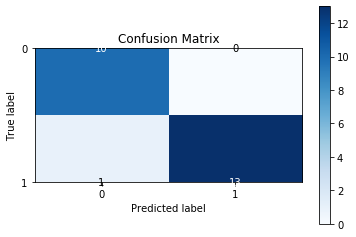

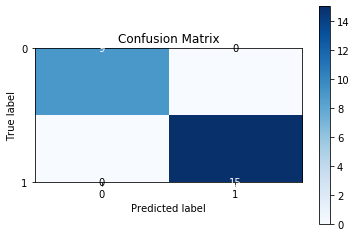

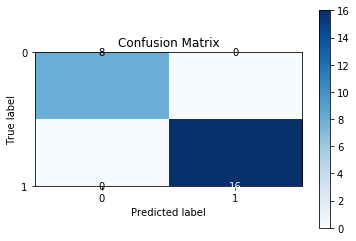

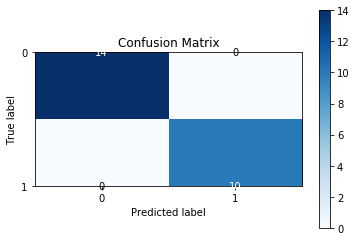

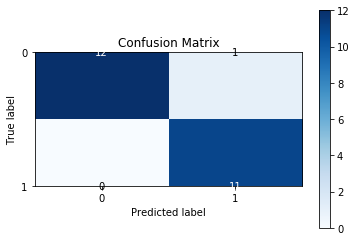

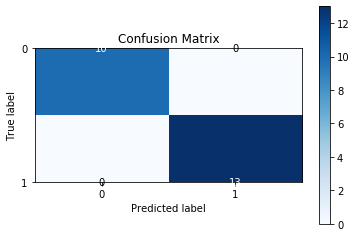

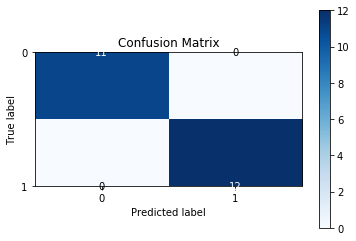

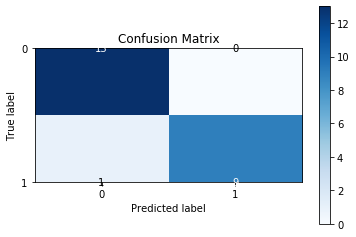

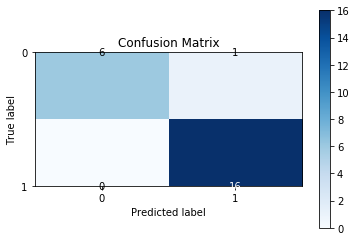

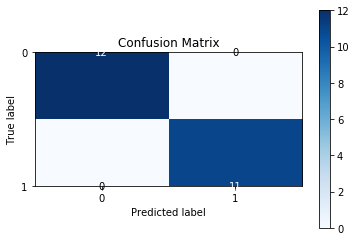

In [35]:
iteration = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #print(X_train.shape, y_train.shape)
    
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    NB_acc_in[iteration]  = nb_model.score(X_train, y_train)
    
    y_pred_nb             = nb_model.predict(X_test)
    NB_acc_out[iteration] = nb_model.score(X_test, y_test)
    
    svm_model = svm.SVC(kernel="linear")
    svm_model.fit(X_train, y_train)
    
    SVM_acc_in[iteration] = svm_model.score(X_train, y_train)
    
    y_pred_svm = svm_model.predict(X_test)
    SVM_acc_out[iteration] = svm_model.score(X_test, y_test)
    print(confusion_matrix(y_test, y_pred_svm))
    skplot.metrics.plot_confusion_matrix(y_test, y_pred_svm)
    
    iteration += 1

In [25]:
NB_acc_in.mean()

1.0

In [26]:
NB_acc_out.mean()

0.9958333333333333

In [27]:
SVM_acc_in.mean()

1.0

In [28]:
SVM_acc_out.mean()

0.9829710144927537

# Cross-val score

## Ibsen

In [8]:
from sklearn.model_selection import cross_val_score

In [30]:
X_dict, y_str = get_dataset_from_json("featuresIbsen_bigrams_pos_punct.json")

In [31]:
v = DictVectorizer(sparse=False)
encoder = LabelEncoder()

X = v.fit_transform(X_dict)
y = encoder.fit_transform(y_str)

In [32]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [33]:
svm_model = svm.SVC(kernel="linear")

In [34]:
cross_val_score(svm_model, X, y, cv=kf, n_jobs=-1)

array([0.95833333, 1.        , 1.        , 1.        , 0.95833333,
       1.        , 1.        , 0.95652174, 0.95652174, 1.        ])

## Quixote

In [37]:
X_dict, y_str = get_dataset_from_json("featuresQuixote_cohesive_punctuation.json")

In [38]:
v = DictVectorizer(sparse=False)
encoder = LabelEncoder()

X = v.fit_transform(X_dict)
y = encoder.fit_transform(y_str)

In [39]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [40]:
svm_model = svm.SVC(kernel="linear")

In [41]:
cross_val_score(svm_model, X, y, cv=kf, n_jobs=-1)

array([0.97368421, 0.97368421, 0.97368421, 0.92105263, 1.        ,
       0.86842105, 0.97368421, 1.        , 0.94594595, 0.94594595])

# Quixote with Term Frequency (per translator)

In [3]:
X_dict, y_str = get_dataset_from_json("featuresQuixote_cohesive_punctuation_tf.json")

In [4]:
v = DictVectorizer(sparse=False)
encoder = LabelEncoder()

X = v.fit_transform(X_dict)
y = encoder.fit_transform(y_str)

In [5]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [6]:
svm_model = svm.SVC(kernel="linear")

In [9]:
cross_val_score(svm_model, X, y, cv=kf, n_jobs=-1)

array([0.23684211, 0.18421053, 0.26315789, 0.31578947, 0.28947368,
       0.26315789, 0.28947368, 0.28947368, 0.27027027, 0.2972973 ])